In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df_audio_features = pd.read_csv('/kaggle/input/5ms-upgrade/5MS_audio_features.csv', index_col=0)
df_5MS = pd.read_csv('/kaggle/input/5ms-upgrade/final_5MS.csv', index_col=0)

# TO DO: MERGE AUDIO FEATURES WITH GENRES

In [3]:
df_audio_features = df_audio_features.merge(df_5MS, how='right', right_on='id', left_on='id')[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'tag', 'id']]
df_audio_features

danceability  energy   key  loudness  mode  speechiness  acousticness  \
0              0.485   0.710   7.0    -6.288   1.0       0.3640        0.0444   
1              0.828   0.654  10.0    -8.348   0.0       0.0784        0.1520   
2              0.889   0.818   9.0    -4.639   1.0       0.2530        0.4700   
3              0.612   0.850   1.0    -4.703   1.0       0.5000        0.0393   
4              0.792   0.694   8.0    -8.496   0.0       0.3300        0.0619   
...              ...     ...   ...       ...   ...          ...           ...   
302213         0.417   0.327   7.0   -12.678   1.0       0.0321        0.6530   
302214         0.309   0.871   5.0    -3.556   1.0       0.0867        0.0972   
302215         0.632   0.188  11.0   -13.764   0.0       0.0364        0.6640   
302216         0.352   0.790   2.0    -2.915   1.0       0.0319        0.0719   
302217         0.407   0.523   0.0    -6.431   1.0       0.0331        0.4540   

        instrumentalness  liveness  valence    tempo  duration_ms      tag  \
0               0.000000    0.3500    0.473  170.942     316267.0      rap   
1               0.000000    0.0563    0.862   93.007     247827.0      rap   
2               0.000000    0.1790    0.782   96.063     302760.0      rap   
3               0.000000    0.2550    0.781  173.497     204027.0      rap   
4               0.000023    0.2500    0.804  177.094     309773.0      rap   
...                  ...       ...      ...      ...          ...      ...   
302213          0.608000    0.2290    0.394   84.681     167400.0       rb   
302214          0.000000    0.1970    0.550   84.574     191478.0  country   
302215          0.002970    0.4810    0.573   88.876     123200.0       rb   
302216          0.000000    0.0714    0.320   74.973     200000.0      pop   
302217          0.000000    0.0874    0.336  138.958     166427.0  country   

                            id  
0       2tQM1BUrXp2kqOM6mN11TC  
1       04kvMnJ6zo72bSnZDWyE7m  
2       5ByAIlEEnxYdvpnezg7HTX  
3       1Z7C8ClE8UEaH70jCCeJH2  
4       4LGMSdeKOUoy5Wf75Je0Hl  
...                        ...  
302213  29EAgZQVXMQwm2O81MffjV  
302214  46XuJOFMgB1biZv3rztHpT  
302215  6yItLFQtv1NVafUWSkmE2S  
302216  2bVh1aGyCWxKkZvEn61xZ1  
302217  6xboopPn3bSJ93xZ9N6BZM  

[302218 rows x 14 columns]

# EDA

# Spotify audio features

**a) confidence measures**

* **Acousticness**: A measure from 0.0 to 1.0 that detects acoustic sounds in a track.
* **Liveness**: A measure from 0.0 to 1.0 that detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* **Speechiness**: A measure from 0.0 to 1.0 that detects the presence of spoken words in a track. The more speech sounds are heard in the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the value will be.
* **Instrumentalness**: A measure from 0.0 to 1 that reflects the extent to which a track does not contain vocalizations. The closer the instrumentalness value is to 1.0, the greater the likelihood that the track does not contain vocal content.

**b) perceptual measures**
* **Energy**: A measure from 0.0 to 1.0 that reflects the intensity of a track. Energetic tracks are usually fast, loud, and noisy.
* **Loudness**: A measure from -60 and 0 that represents the overall loudness of a track. This value is measured in decibels (dB). Loudness values are averaged across the entire track.
* **Danceability**: A measure from 0.0 to 1 that indicates how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, and beat strength. A value closer to 0.0 indicates that a track is less danceable, and value closer to 1.0 is indicates that a track is more danceable.
* **Valence**: A measure from 0.0 to 1.0 that reflects the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**c) music descriptors**
* **Tempo**: The overall estimated speed of a track measured in beats per minute (BPM).
* **Duration**: The duration of a track measured in milliseconds.
* **Key**: A measure from 0 to 11 that indicates the key of a track.
* **Mode**: A measure that indicates the key in the music of the track (1 is major, and 0 is for minor)

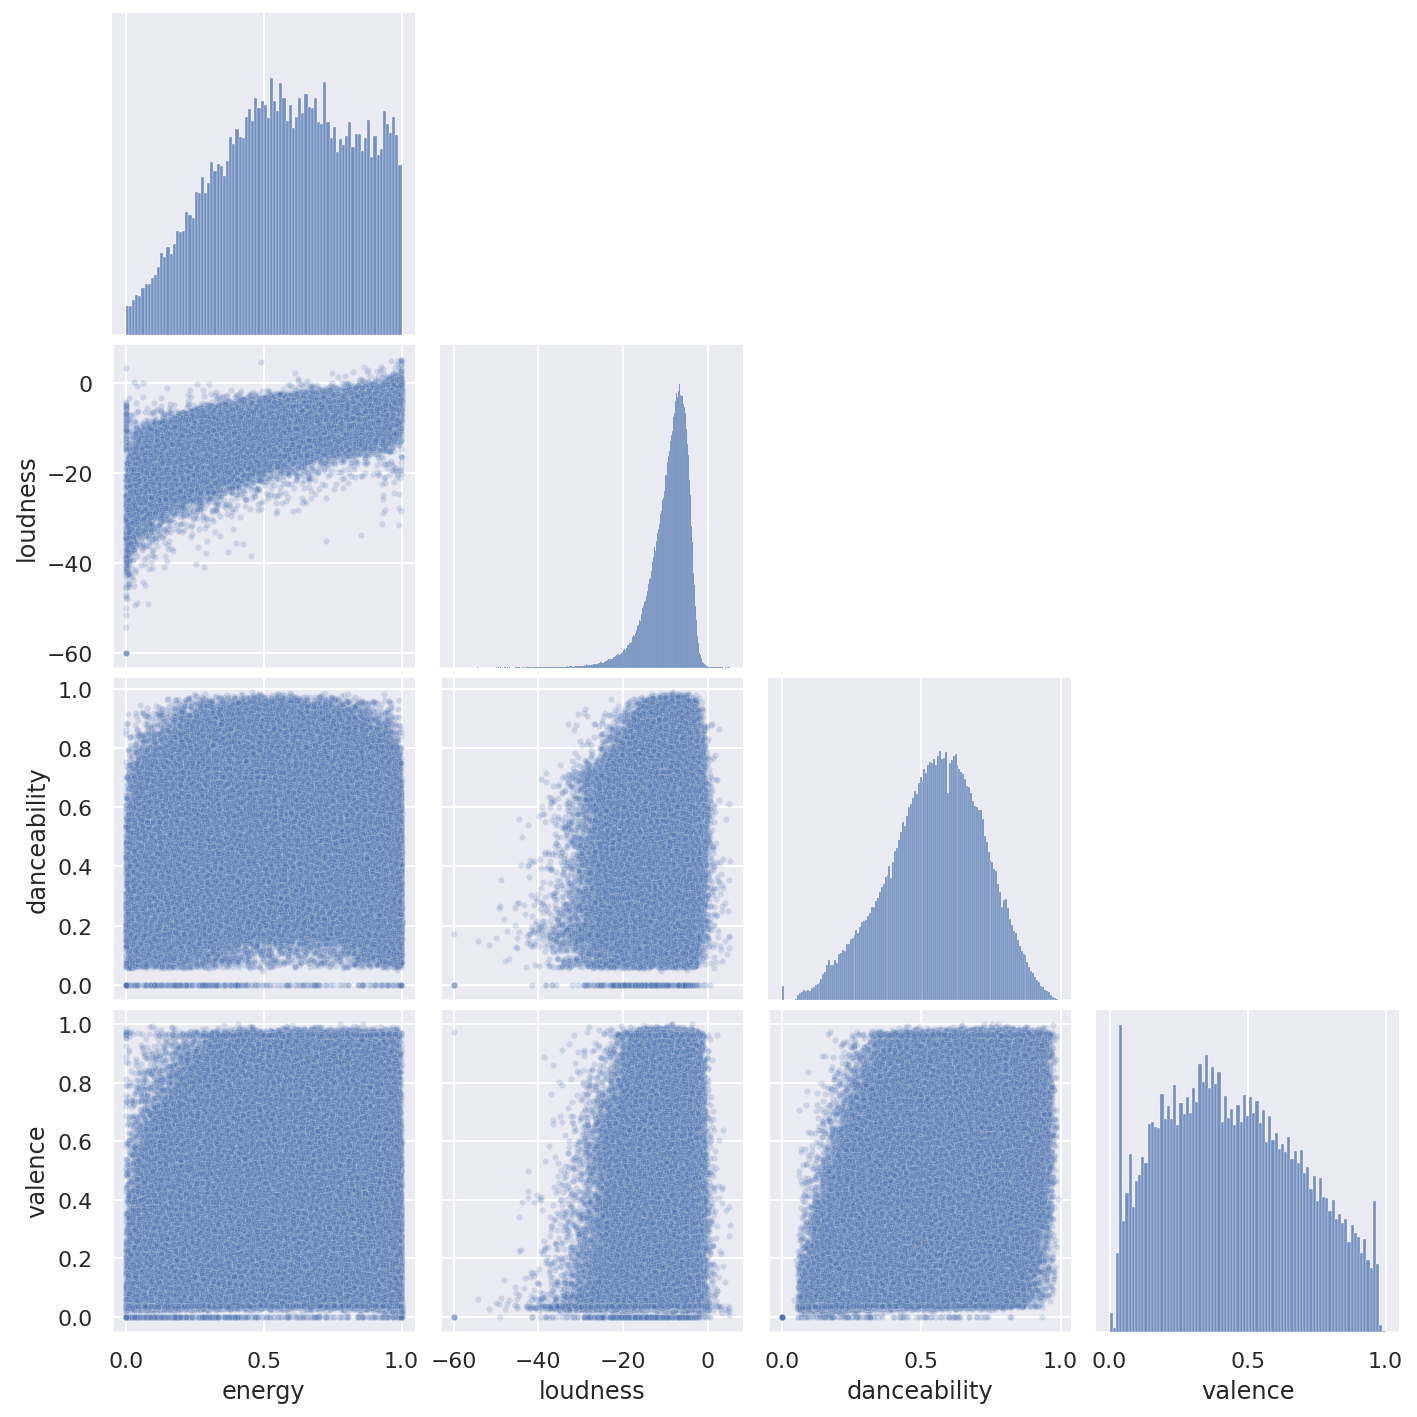

In [4]:
perceptual_meas = ['energy','loudness', 'danceability', 'valence', 'tag']

sns.pairplot(df_audio_features[perceptual_meas], corner=True, plot_kws={'s':10, 'alpha':0.2})

In [5]:
df_audio_features[perceptual_meas].corr().style.background_gradient()

# TO DO: COMBINACIÓN VECTORIAL VALENCE ENERGY

In [6]:
colors = plt.rcParams["axes.prop_cycle"]()

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i, genre in enumerate(df_audio_features.tag.unique()):
    c=next(colors)["color"]
    ax = axs.flatten()[i]
    ax.scatter(x=df_audio_features[df_audio_features.tag==genre].valence, y=df_audio_features[df_audio_features.tag==genre].energy, alpha=0.2, s=1, c=c, label=genre)

    ax.axvline(0.5, c='grey', ls='-')
    ax.axhline(0.5, c='grey', ls='-')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Valence")
    ax.set_ylabel("Energy")
    ax.set_xticks(ticks=[0,.2,.4,.6,.8,1], labels=['−', '', '', '', '', '+'])
    ax.set_yticks(ticks=[0,.2,.4,.6,.8,1], labels=['−', '', '', '', '', '+'], rotation=90)
    ax.legend(scatterpoints=100)
    
fig.tight_layout()

In [7]:
import numpy as np

relevant_meas=['mode', 'energy', 'danceability', 'valence', 'liveness', 'instrumentalness', 'acousticness', 'speechiness']
grouped_features = df_audio_features.groupby('tag')[relevant_meas].mean()

angles = np.linspace(0, 2*np.pi, len(relevant_meas), endpoint=False)
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(221, polar=True)

for genre in df_audio_features.tag.unique():
    features = grouped_features.loc[genre].tolist()
    ax.plot(angles, features, 'o-', linewidth=2, label = f"{genre} music")
    ax.fill(angles, features, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, relevant_meas, fontsize = 13)
    
lg = plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_audio_features['tag']= label_encoder.fit_transform(df_audio_features['tag'])
label_encoder.classes_

array(['country', 'misc', 'pop', 'rap', 'rb', 'rock'], dtype=object)

# TO DO: DIVIDIR LA BBDD EN VAL, TEST Y TRAIN

In [9]:
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
classes = df_audio_features.tag.unique()

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_audio_features[columns], df_audio_features.tag, test_size=0.2, random_state=1)

# val_split = 0.1
# val_indices = int(len(x_train) * val_split)
# new_x_train, new_y_train = x_train[val_indices:], y_train[val_indices:]
# x_val, y_val = x_train[:val_indices], y_train[:val_indices]

print(f"Training data samples: {len(x_train)}")
# print(f"Validation data samples: {len(x_val)}")
print(f"Test data samples: {len(x_test)}")

Training data samples: 241774
Test data samples: 60444


# TO DO: CONSTRUCCION DE UN MODELO
1. pipeline de preprocesamiento
2. modelo

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

transformer = Pipeline([('imputer', SimpleImputer()), ('scaler', StandardScaler())])
transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

# TO DO: CROSS VALIDATION PARA PREDECIR TODO EL CONJUNTO DE TRAIN

In [12]:
from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

transformer = Pipeline([('imputer', SimpleImputer(strategy = 'mean')), ('scaler', StandardScaler())])
rf_model = ensemble.RandomForestClassifier(max_depth = 9)

parameters = {}
parameters['clas__n_estimators'] = [100, 300]
parameters['clas__max_depth'] = [None, 3, 5, 7, 9]

cv = KFold(n_splits=3, random_state=42, shuffle=True)

pred_probs_train = np.zeros((len(y_train), len(np.unique(y_train))))

best_score = 0
best_model = None
for i, (train_index, test_index) in enumerate(cv.split(x_train, y_train)):
    
    x_train_cv, x_test_cv = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    churn_pipe_forest = Pipeline(steps=[('prep', transformer), ('clas', rf_model)])
    churn_pipe_forest.fit(x_train_cv, y_train_cv)
    print(f'\nCV#{i+1}: \nAccuracy sin ajuste de hiperparámetros:', churn_pipe_forest.score(x_test_cv, y_test_cv))

    GS = GridSearchCV(churn_pipe_forest, parameters, scoring='accuracy')
    GS.fit(x_train_cv, y_train_cv)
    churn_pipe_forest = GS.best_estimator_
    
    pred_probs_train[test_index] = churn_pipe_forest.predict_proba(x_test_cv)
    score = accuracy_score(y_test_cv, np.argmax(pred_probs_train[test_index], axis=1))
    
    print('Accuracy tras el ajuste de hiperparámetros:', score)
    if score > best_score:
        best_score = score
        best_model = churn_pipe_forest

y_train_pred = np.argmax(pred_probs_train, axis=1)
report = classification_report(y_train, y_train_pred, output_dict=True)

print('\nMétricas en entrenamiento:')
pd.DataFrame(report).T


CV#1: 
Accuracy sin ajuste de hiperparámetros: 0.5339115544967242
Accuracy tras el ajuste de hiperparámetros: 0.5499553305539011

CV#2: 
Accuracy sin ajuste de hiperparámetros: 0.5349356627911305
Accuracy tras el ajuste de hiperparámetros: 0.5495278629127321

CV#3: 
Accuracy sin ajuste de hiperparámetros: 0.5333970294449752
Accuracy tras el ajuste de hiperparámetros: 0.5487461379062178

Métricas en entrenamiento:


precision    recall  f1-score       support
0              0.576704  0.766866  0.658328   56105.00000
1              0.755161  0.239714  0.363910   13124.00000
2              0.380279  0.229018  0.285873   47219.00000
3              0.640690  0.667176  0.653665   29439.00000
4              0.472719  0.531053  0.500191   43152.00000
5              0.600563  0.631289  0.615542   52735.00000
accuracy       0.549410  0.549410  0.549410       0.54941
macro avg      0.571019  0.510852  0.512918  241774.00000
weighted avg   0.542465  0.549410  0.531481  241774.00000

In [13]:
best_model.get_params()

{'memory': None,
 'steps': [('prep',
   Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])),
  ('clas', RandomForestClassifier(n_estimators=300))],
 'verbose': False,
 'prep': Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]),
 'clas': RandomForestClassifier(n_estimators=300),
 'prep__memory': None,
 'prep__steps': [('imputer', SimpleImputer()), ('scaler', StandardScaler())],
 'prep__verbose': False,
 'prep__imputer': SimpleImputer(),
 'prep__scaler': StandardScaler(),
 'prep__imputer__add_indicator': False,
 'prep__imputer__copy': True,
 'prep__imputer__fill_value': None,
 'prep__imputer__missing_values': nan,
 'prep__imputer__strategy': 'mean',
 'prep__imputer__verbose': 0,
 'prep__scaler__copy': True,
 'prep__scaler__with_mean': True,
 'prep__scaler__with_std': True,
 'clas__bootstrap': True,
 'clas__ccp_alpha': 0.0,
 'clas__class_weight': None,
 'clas__criterion': 'gini',
 'clas__max_depth': None,
 'clas__max_features': 'auto',
 

0. 'country' 
1. 'misc' 
2. 'pop'
3. 'rap'
4. 'rb'
5. 'rock'

In [14]:
pred_probs_test = best_model.predict_proba(x_test)
y_test_pred = np.argmax(pred_probs_test, axis=1)
report = classification_report(y_test, y_test_pred, output_dict=True)

print('\nMétricas en test:')
pd.DataFrame(report).T


Métricas en test:


precision    recall  f1-score      support
0              0.581347  0.774650  0.664221  14138.00000
1              0.763231  0.242192  0.367703   3394.00000
2              0.381726  0.227047  0.284736  11905.00000
3              0.644340  0.680016  0.661697   7441.00000
4              0.472295  0.525888  0.497653  10584.00000
5              0.595336  0.633261  0.613714  12982.00000
accuracy       0.551320  0.551320  0.551320      0.55132
macro avg      0.573046  0.513843  0.514954  60444.00000
weighted avg   0.543907  0.551320  0.532503  60444.00000

# TO DO: GUARDAR LAS PRED_PROBAS DE TRAIN

In [15]:
df_pred_probs_train = pd.DataFrame(pred_probs_train, columns = ['prob_0','prob_1','prob_2','prob_3','prob_4','prob_5'])
y_train.reset_index(drop=True, inplace=True)

df_train = pd.merge(df_pred_probs_train, y_train, right_index=True, left_index=True)
df_train.to_csv('/kaggle/working/predicts_vs_real_TRAIN.csv')

# TO DO: COMBINING MODELS
DOS OPCIONES:
> 1: USAR UN MODELO DE REGRESION PARA APRENDER DE LOS 2 OUTPUTS

> 2: HACERLO CASERO

In [16]:
df_pred_probs_test = pd.DataFrame(pred_probs_test, columns = ['prob_0','prob_1','prob_2','prob_3','prob_4','prob_5'])
y_test.reset_index(drop=True, inplace=True)

df_audiofeats_results = pd.merge(df_pred_probs_test, y_test, right_index=True, left_index=True)
df_audiofeats_results.to_csv('/kaggle/working/predicts_vs_real_TEST.csv')
df_audiofeats_results

prob_0    prob_1    prob_2    prob_3    prob_4    prob_5  tag
0      0.166667  0.060000  0.306667  0.070000  0.280000  0.116667    4
1      0.003333  0.016667  0.143333  0.006667  0.000000  0.830000    5
2      0.873333  0.030000  0.066667  0.000000  0.006667  0.023333    0
3      0.016667  0.023333  0.030000  0.646667  0.280000  0.003333    3
4      0.700000  0.020000  0.110000  0.000000  0.043333  0.126667    0
...         ...       ...       ...       ...       ...       ...  ...
60439  0.653333  0.003333  0.186667  0.010000  0.036667  0.110000    1
60440  0.013333  0.013333  0.043333  0.070000  0.846667  0.013333    4
60441  0.016667  0.020000  0.113333  0.356667  0.483333  0.010000    3
60442  0.553333  0.020000  0.186667  0.006667  0.030000  0.203333    5
60443  0.120000  0.103333  0.540000  0.010000  0.133333  0.093333    2

[60444 rows x 7 columns]

In [17]:
df_lstm_results = pd.read_csv("/kaggle/input/lstm-results/predicts_vs_real_TEST.csv", index_col=0)
df_lstm_results

prob_0    prob_1    prob_2    prob_3    prob_4    prob_5  tag
0      0.090039  0.104208  0.276295  0.129321  0.191642  0.208496    4
1      0.006214  0.015743  0.097567  0.005129  0.007489  0.867858    5
2      0.775781  0.006770  0.117163  0.001047  0.057511  0.041728    0
3      0.090039  0.104208  0.276295  0.129321  0.191642  0.208496    3
4      0.153446  0.028129  0.248458  0.001172  0.019992  0.548803    0
...         ...       ...       ...       ...       ...       ...  ...
60439  0.210657  0.025693  0.299421  0.010767  0.234759  0.218702    1
60440  0.182885  0.017718  0.231375  0.004343  0.441761  0.121917    4
60441  0.004698  0.010108  0.034521  0.788178  0.151593  0.010902    3
60442  0.419601  0.019386  0.217238  0.002040  0.049935  0.291800    5
60443  0.517316  0.043001  0.247387  0.006094  0.103261  0.082941    2

[60444 rows x 7 columns]

In [18]:
# sumamos ambas probabilidades
combined_preds = df_lstm_results.drop('tag', axis='columns').to_numpy() + pred_probs_test
y_test_pred = np.argmax(combined_preds, axis=1)
report = classification_report(y_test, y_test_pred, output_dict=True)
pd.DataFrame(report).T

precision    recall  f1-score       support
0              0.607927  0.861367  0.712789  14138.000000
1              0.848140  0.241897  0.376433   3394.000000
2              0.399643  0.225451  0.288277  11905.000000
3              0.797766  0.652600  0.717918   7441.000000
4              0.572590  0.612245  0.591754  10584.000000
5              0.576547  0.680558  0.624249  12982.000000
accuracy       0.593177  0.593177  0.593177      0.593177
macro avg      0.633769  0.545686  0.551903  60444.000000
weighted avg   0.590835  0.593177  0.570712  60444.000000

Obtenemos una mejora del **~6%** en el clasificador final